In [28]:
import pandas as pd
import pylab as plt
import statsmodels.api as sm

In [29]:
sl = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_keep_all_66.csv", header=5, index_col="year")
sl_ns = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_all_66.csv", header=5, index_col="year")

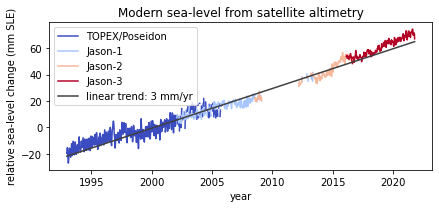

In [30]:
fig = plt.figure(figsize=(6.2, 3))
ax = fig.add_subplot(111)
sl_ns.plot(ax=ax, colormap="coolwarm")
sl_ns["mean"] = sl_ns.mean(axis=1)
X = sl_ns.index
y = sl_ns["mean"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
b, a = model.params
l_trend = ax.plot(sl_ns.index, a * sl_ns.index + b, color="0.25", label=f"linear trend: {a:.0f} mm/yr")
ax.legend()
ax.set_ylabel("relative sea-level change (mm SLE)")
plt.title("Modern sea-level from satellite altimetry")
fig.tight_layout()
fig.savefig("figures/sea-level-from-altimetry.pdf")

In [23]:
!open figures/sea-level-from-altimetry.pdf

In [31]:
ax.legend?

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 3.145e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:17:56   Log-Likelihood:                -3812.9
No. Observations:                1292   AIC:                             7630.
Df Residuals:                    1290   BIC:                             7640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6021.1139     34.083   -176.660      0.0